## 1. Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information: 

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park. 

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set (`Xt`/`yt`) and testset (`Xte`/`yte`).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

print(f"pandas version: {pd.__version__}\nnumpy version: {np.__version__}")

pandas version: 2.0.3
numpy version: 1.24.4


In [2]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')

Xt = d['Xt'] 	#training dataset input: "livebait","camper","persons","child"
Xte = d['Xte']	#test dataset input: "livebait","camper","persons","child"
yt = d['yt']	#training dataset output: "count"
yte = d['yte']	#test dataset output: "count"

pd.DataFrame(Xt[0:5,:],columns=["livebait","camper","persons","child"])

,livebait,camper,persons,child
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0
2,1.0,1.0,3.0,0.0
3,1.0,1.0,3.0,2.0
4,1.0,1.0,4.0,1.0


In [3]:
print(f"Shape of training data: {Xt.shape}")
print(f"Shape of test data: {Xte.shape}")
print(f"Shape of training labels: {yt.shape}")
print(f"Shape of test labels: {yte.shape}")

Shape of training data: (200, 4)
Shape of test data: (50, 4)
Shape of training labels: (200,)
Shape of test labels: (50,)


In [4]:
pd.DataFrame(yt[0:5],columns=["count"])

,count
0,6.0
1,1.0
2,6.0
3,1.0
4,3.0


## 1.1 Linear Regression (by hand)

Führen Sie eine lineare Regression durch, indem Sie eine Design-Matrix mit dem Intercept-Term erstellen und die in der Vorlesung angegebenen Fomeln verwenden, um die Koeffizienten für die Trainingsmenge zu bestimmen.

> **Erklärung Design Matrix** 
>
> Die **Design-Matrix** (auch Datenmatrix genannt) ist die Matrixdarstellung der erklärenden Variablen (**Features**) in einem linearen Regressionsmodell.
> Sie ist die Grundlage, um die analytische Lösung
>
> $$
> \^w=(X^TX)^{-1}X^Ty
> $$
>
>anwenden zu können.
>
>In dieser Darstellung gilt:
>
>- $y$: Vektor der Zielvariablen (z. B. Anzahl gefangener Fische, hier `yt`/`yte`)
>- $X$: Design-Matrix (enthält alle Prädiktoren und den Intercept)
>- $w$: Vektor der Regressionskoeffizienten
>- $(X^TX)^{-1}X^Ty$: Normalengleichung zur Berechnung der Gewichte
>
> Für $N$ Beobachtungen (Datenpunkte, hier 200 im Training und 50 im Test) und $d$ erklärende Merkmale (hier 4) sollte die Design-Matrix $X$ wie folgt aussehen:
> 
> $$
> X = \begin{bmatrix}
> 1 & x_{11} & x_{12} & x_{13} & x_{14} \\
> 1 & x_{21} & x_{22} & x_{23} & x_{24} \\
> \vdots & \vdots & \vdots & \vdots & \vdots \\
> 1 & x_{N1} & x_{N2} & x_{N3} & x_{N4}
> \end{bmatrix}
> $$
> 
> wobei:
> - die erste Spalte aus Einsen besteht (für den Intercept-Term $b_0$),
> - $x_{i1}$ die Angabe zur Verwendung von Lebendköder für die i-te Beobachtung (`livebait`),
> - $x_{i2}$ die Angabe, ob die Gruppe mit einem Wohnmobil kam (`camper`),
> - $x_{i3}$ die Anzahl der Personen in der Gruppe (`persons`),
> - $x_{i4}$ die Anzahl der Kinder in der Gruppe (`child`).
> 
> Die Design-Matrix lässt sich somit auch wie folgt darstellen:
> 
> $$
> X = \begin{bmatrix}
> 1 & \text{livebait}_1 & \text{camper}_1 & \text{persons}_1 & \text{child}_1 \\
> 1 & \text{livebait}_2 & \text{camper}_2 & \text{persons}_2 & \text{child}_2 \\
> \vdots & \vdots & \vdots & \vdots & \vdots \\
> 1 & \text{livebait}_N & \text{camper}_N & \text{persons}_N & \text{child}_N
> \end{bmatrix}
> $$
> 
> für $N = 200$ Beobachtungen im Trainingsset (`Xt`) und $N = 50$ im Testset (`Xte`).

### 1.1.1 Umsetzung in Python

In Python kann die Design Matrix für die Trainingsdaten (`Xt`) wie folgt gezeigt erstellt werden

In [6]:
# Add bias term to input data matrix with np.hstack (horizontal stack)
X_design = np.hstack((np.ones((Xt.shape[0],1)), Xt))

# Now the first column is the bias term (constant 1)
pd.DataFrame(X_design[0:5,:],columns=["bias","livebait","camper","persons","child"])

,bias,livebait,camper,persons,child
0,1.0,1.0,0.0,4.0,0.0
1,1.0,1.0,1.0,2.0,0.0
2,1.0,1.0,1.0,3.0,0.0
3,1.0,1.0,1.0,3.0,2.0
4,1.0,1.0,1.0,4.0,1.0


Anschließend können die Gewichte $\^w$ mit der Normalengleichung $\^w=(X^TX)^{-1}X^Ty$ berechnet werden.

In [7]:
omega = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ yt
print("Learned weights:")
pd.DataFrame(omega, index=["bias","livebait","camper","persons","child"], columns=["weight"])

Learned weights:


,weight
bias,-8.492228
livebait,2.482214
camper,2.954307
persons,4.649539
child,-5.471601


> Die `@`-Operation in Python steht für die Matrixmultiplikation. </br>
> Mittels `<pd.DataFrame>.T` wird die Transponierte einer DataFrame-Matrix gebildet.
>
> Die Berechnung `X_design.T @ X_design` entspricht somit der Matrixmultiplikation $X^TX$.
>
> $$
> \begin{bmatrix}
> 1 & 1 & 1 & \cdots & 1_N \\
> \text{livebait}_1 & \text{livebait}_2 & \text{livebait}_3 & \cdots & \text{livebait}_N \\
> \text{camper}_1 & \text{camper}_2 & \text{camper}_3 & \cdots & \text{camper}_N \\
> \text{persons}_1 & \text{persons}_2 & \text{persons}_3 & \cdots & \text{persons}_N \\
> \text{child}_1 & \text{child}_2 & \text{child}_3 & \cdots & \text{child}_N
> \end{bmatrix}
> \times
> \begin{bmatrix}
> 1 & \text{livebait}_1 & \text{camper}_1 & \text{persons}_1 & \text{child}_1 \\
> 1 & \text{livebait}_2 & \text{camper}_2 & \text{persons}_2 & \text{child}_2 \\
> \vdots & \vdots & \vdots & \vdots & \vdots \\
> 1 & \text{livebait}_N & \text{camper}_N & \text{persons}_N & \text{child}_N
> \end{bmatrix}
> $$
> 
> Das Ergebnis ist hier also eine 5x5-Matrix wobei jedes Element $i,j$ das Skalarprodukt der Spalte $i$ und Spalte $j$ von $X$ und sieht somit wie folgt aus:
> 
> $$
> \begin{bmatrix}
> \sum{1} & \sum \text{livebait}_i & \sum \text{camper}_i & \sum \text{persons}_i & \sum \text{child}_i \\
> \sum \text{livebait}_i & \sum \text{livebait}_i^2 & \sum \text{livebait}_i \cdot \text{camper}_i & \sum \text{livebait}_i \cdot \text{persons}_i & \sum \text{livebait}_i \cdot \text{child}_i \\
> \sum \text{camper}_i & \sum \text{camper}_i \cdot \text{livebait}_i & \sum \text{camper}_i^2 & \sum \text{camper}_i \cdot \text{persons}_i & \sum \text{camper}_i \cdot \text{child}_i \\
> \sum \text{persons}_i & \sum \text{persons}_i \cdot \text{livebait}_i & \sum \text{persons}_i \cdot \text{camper}_i & \sum \text{persons}_i^2 & \sum \text{persons}_i \cdot \text{child}_i \\
> \sum \text{child}_i & \sum \text{child}_i \cdot \text{livebait}_i & \sum \text{child}_i \cdot \text{camper}_i & \sum \text{child}_i \cdot \text{persons}_i & \sum \text{child}_i^2
> \end{bmatrix}
> $$
>
> Das Ergebnis wird anschließend invertiert mittels `np.linalg.inv()` und mit `X_design.T @ y_train` multipliziert, was dem Vektor $X^Ty$ entspricht. Da es sich bei `y_train` um einen Vektor handelt, ist das Ergebnis der Multiplikation ebenfalls ein Vektor mit der Länge der Anzahl der Merkmale (hier 5 inklusive Intercept-Term).

In [8]:
omega.shape

(5,)

## 1.2 Linear Regression (using sklearn)

Wiederholen Sie [1.1](exercise_2_1.ipynb#11-linear-regression-by-hand), aber dieses Mal mit `LinearRegression` aus `sklearn.linear_model`.

In [9]:
import sklearn.linear_model

# Verify with sklearn linear regression implementation
linreg = sklearn.linear_model.LinearRegression(fit_intercept=True)
# Fit the model to the training data
linreg.fit(Xt, yt)

print("Learned weights (sklearn):")
pd.DataFrame(np.hstack((linreg.intercept_, linreg.coef_)), index=["bias","livebait","camper","persons","child"], columns=["weight"])

Learned weights (sklearn):


,weight
bias,-8.492233
livebait,2.482214
camper,2.954308
persons,4.649541
child,-5.471601


Wie an der Ausgabe zu sehen sind die Gewichte von Aufgabenteil a) und b) identisch und stimmen mit der hier angegebenen Lösung überein:

Result: `array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])`
Don't forget the intercept, you should have 5 numbers!

## 1.3 $\text{RMSE}$, $\sigma^2$ and $\text{NLL}$ ermitteln

Bestimmen Sie den mittleren quadratischen Fehler (Root Mean Square Error, RMSE) und die durchschnittliche negative Log-Likelihood (NLL) für den Testsatz. 

Für die NLL wird angenommen, dass die bedingte Wahrscheinlichkeitsverteilung (CPD) $p(y|x)$ durch die Dichte eines Gauß mit konstanter Varianz $\sigma^2$ gegeben ist. 

Die Steigung und der Achsenabschnitt des linearen Modells können wie in der Vorlesung gezeigt geschätzt werden. 
Zur Schätzung von $\sigma^2$ kann man die Varianz der Residuen verwenden. Verwenden Sie die Varianzschätzung mit $1/N$. 


Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

### 1.3.1 Annahmen aus Aufgabenbeschreibung

#### Lineares Regressionsmodell

Das lineares Regressionsmodell (geschätzt auf dem Trainingsset) lautet:

$$\hat{y}(x) = f_{\theta}(x) = w_0+w_1x_1+\dots+w_dx_d=X\hat{\beta}.$$

($\hat{\beta}$ wird dabei wie in der Vorlesung *04_linear_methods.pdf S.23 (20)* mit der Normalengleichung geschätzt.)

#### Probabilistische Annahmen

Probabilistische Annahme:  $p(y∣x)$ ist normalverteilt (Gauß) mit Mittelwert $\mu(x)=\hat{y}(x)$ und konstanter Varianz $\sigma^2$:

$$
p(y∣x)=N(y;μ(x)=\hat{y}(x), σ^2).
$$

(Standardannahme für homoskedastische lineare Regression).

#### Varianz der Residuen

$\sigma^2$ wird mit der Varianz der Residuen geschätzt und dabei die Variante mit $1/N$ verwendet (nicht $1/(N−p)$). Das heißt:
$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
wobei die Summe typischerweise über das Trainingsset läuft (weil $\hat{\beta}$ und damit Residuen aus dem Training stammen).

### 1.3.2 Berechnung RSME/MSE

Laut der Vorlesung `04_linear_methods.pdf` **S.10** ist der **Mean Squared Error (MSE)** wie folgt definiert (auf dem Testset mit $N_{Test} = 200$ Testpunkten):

$$
Loss = MSE = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (y_i - \hat{y}_i)^2
$$

Der **Root Mean Squared Error (RMSE)** ist dann entsprechend die Quadratwurzel des MSE:
$$
RMSE = \sqrt{MSE}
$$

wobei:
- $y_i$: tatsächlicher Wert der Zielvariable für den i-ten Testpunkt (hier `yte`)
- $\hat{y}_i$: vorhergesagter Wert der Zielvariable für den i-ten Testpunkt (berechnet mit den gelernten Gewichten und den Testdaten `Xte`)

Der $Loss$ gibt also den durchschnittlichen quadratischen Fehler der Vorhersagen auf dem Testset an.

Zum Schätzen der Koeffizienten mittels der Normalengleichung wird zuerst eine Design-Matrix mit Intercept-Term für die Trainings- und Testdaten erstellt:

In [25]:
X_train_design = np.hstack([np.ones((Xt.shape[0],1)), Xt])  # N_train x (d+1)
X_test_design  = np.hstack([np.ones((Xte.shape[0],1)), Xte])    # N_test x (d+1)

Anschließend lassen sich die Koeffizienten $\hat{\beta}$ mit der Normalengleichung wie folgt berechnen:

In [ ]:
XtX = X_train_design.T @ X_train_design
Xt_y = X_train_design.T @ yt
beta_hat = np.linalg.solve(XtX, Xt_y)   # (d+1,1)

Nun können die Vorhersagen für Trainings- ($\hat{y}_{train}$) und Testdaten ($\hat{y}_{test}$) berechnet werden:

In [28]:
# Vorhersagen
yhat_train = X_train_design @ beta_hat
yhat_test  = X_test_design  @ beta_hat

Anschließend lässt sich der MSE und RMSE auf dem Testset wie folgt berechnen:

In [29]:
mse_test = np.mean((yte - yhat_test)**2)
rmse_test = np.sqrt(mse_test)
print(f"Test MSE: \t\t\t{mse_test:.4f}")
print(f"Test RMSE: \t\t\t{rmse_test:.4f}")
print(f"RMSE according to solution:\t8.58812")

Test MSE: 			73.7559
Test RMSE: 			8.5881
RMSE according to solution:	8.58812


Gleiche Rechnung (ohne `np`):

In [17]:
N_test = yte.shape[0]

loss_sum = 0.0
for i in range(N_test):
    y_pred = yte[i] - (Xte[i,:] @ omega[1:] + omega[0])
    loss_sum += y_pred**2
mse = loss_sum / N_test
rmse = np.sqrt(mse)
print(f"Test MSE (manual calculation): {mse:.4f}")
print(f"Test RMSE (manual calculation): {rmse:.4f}")

Test MSE (manual calculation): 73.7559
Test RMSE (manual calculation): 8.5881


Die Zeile `y_pred = yte[i] - (Xte[i,:] @ omega[1:] + omega[0])` ist notwendig, um die Residuen (Fehler) zwischen den tatsächlichen Werten `yte` und den vorhergesagten Werten zu berechnen. Hierbei wird für jeden Testpunkt $i$ der Unterschied zwischen dem tatsächlichen Wert `yte[i]` und dem vorhergesagten Wert `(Xte[i,:] @ omega[1:] + omega[0])` berechnet. Die `@`-Operator steht für die Matrix-Vektor-Multiplikation, wobei `Xte[i,:]` die Merkmalswerte des i-ten Testpunkts und `omega[1:]` die gelernten Gewichte (ohne den Intercept) sind. `omega[0]` ist der Intercept-Term. Diese Rechnung ist notwendig da es sich bei $\hat{y}_i$ 

### 1.3.3 $\sigma^2$-Schätzung der Residuen

In [33]:
# Sigma^2 schätzen aus Training-Residuals (mit 1/N_train)
N_train = yte.shape[0]
residuals_sum = 0.0

for i in range(N_train):
    y_pred = yte[i] - (Xte[i,:] @ omega[1:] + omega[0])
    residuals_sum += y_pred**2
sigma2 = residuals_sum / N_train

print(f"Estimated sigma^2 from training residuals:\t{sigma2:.4f}")
print(f"Estimated sigma^2 according to solution:\t73.7559")

Estimated sigma^2 from training residuals:	73.7559
Estimated sigma^2 according to solution:	73.7559


### 1.3.4 NLL (Negative Log-Likelihood) ermitteln

Für eine einzelne Beobachtung 
i
i gilt (Gauß-Dichte):

p(yi∣xi)  =  12πσ2exp⁡ ⁣(−(yi−y^i)22σ2).
p(y
i
	​

∣x
i
	​

)=
2πσ
2

er negative Log-Likelihood-Beitrag pro Punkt ist dann

−log⁡p(yi∣xi)=12log⁡(2πσ2)+(yi−y^i)22σ2.
−logp(y
i
	​

∣x
i
	​

)=
2
1
	​

log(2πσ
2
)+
2σ
2
(y
i
	​

−
y
^
	​

i
	​

)
2
	​

.Die durchschnittliche NLL über das Testset (also NLL pro Punkt) ist:

NLLavg  =  −1Ntest∑i=1Ntestlog⁡p(yi∣xi)=12log⁡(2πσ2)+12σ2⋅1Ntest∑i=1Ntest(yi−y^i)2.
NLL
avg
	​

=−
N
test
	​

1
	​

i=1
∑
N
test
	​

	​

logp(y
i
	​

∣x
i
	​

)=
2
1
	​

log(2πσ
2
)+
2σ
2
1
	​

⋅
N
test
	​

1
	​

i=1
∑
N
test
	​

	​

(y
i
	​

−
y
^
	​

i
	​

)
2
.

Wichtig: für die NLL musst du die verwendete 
σ2
σ
2
 einfügen — laut Aufgabenstellung schätzt du 
σ2
σ
2
 aus den Residuen (siehe oben). Die NLL-Formel folgt unmittelbar aus der Log-Likelihood-Definition in der Vorlesung (NLL als -1/N · sum log p).

In [40]:
nll = 0.5 * np.log(2 * np.pi * sigma2) + 0.5 * mse_test / sigma2
	
print(f"Negative Log-Likelihood (NLL) on test set:\t\t{nll:.4f}")
print(f"Negative Log-Likelihood (NLL) according to solution:\t3.569")

Negative Log-Likelihood (NLL) on test set:		3.5693
Negative Log-Likelihood (NLL) according to solution:	3.569


## 1.4 Prediction Interval Plot

In 1.1 - 1.3 haben Sie ein probabilistisches Modell $p(y|x) = N(y | \hat{\beta} x, \hat{\sigma}^2)$ trainiert. Mit $N(y|\mu,\sigma^2)$ bezeichnen wir die Dichte der Gaußschen Verteilung mit Mittelwert $\mu$ und Varianz $\sigma^2$. Bei einem gegebenen Wert $x$ erhalten Sie eine bedingte Vorhersageverteilung ( *conditional predictive distribution* CPD) $p(y|x)$. Wie lässt sich die CPD sinnvoll grafisch darstellen?

Beachten Sie, dass $x$ keine skalare Größe ist und daher nicht auf der x-Achse gegen $x$ aufgetragen werden kann. Daher verwenden wir für jedes Paar $y_i, x_i$ des Testsatzes anstelle von $x_i$ auf der x-Achse den Erwartungswert $\hat{\mu_i} = \mathbb{E}(p(y|x_i))$ (vorhergesagter Mittelwert). Auf der y-Achse möchten wir den beobachteten Wert $y_i$ mit dem Ergebnis aus dem Modell vergleichen. Wir könnten $p(y|x_i)$ darstellen, aber das würde mit vielen Datenpunkten im Testset zu unübersichtlich werden. Stattdessen stellen wir daher $\hat{\mu_i}$ und das 2,5- und 97,5-Perzentil von $p(y|x_i)$ dar. Eine solche Darstellung wird manchmal als **Vorhersageintervall-Diagramm** (*prediction interval plot*) bezeichnet.

> Frage 1: Was ist $\hat{\mu_i}$ für ein gegebenes $x_i$ im Falle einer Gaußschen Verteilung? 
>
> Machen Sie ein solches Diagramm für das Gauß-Modell im Testset für das in c) definierte Gauß-Modell.

> Frage 2: Warum ist ein Gauß-Modell für diese Art von Daten nicht ideal?
> 
> Hinweis: Für die Gauß-Verteilung sind das 2,5%- und 97,5%-Perzentil ungefähr gegeben durch $\mu \pm 1.96*\sigma$.

### 1.4.1 **Frage 1:** Was ist $\hat{\mu_i}$ für ein gegebenes $x_i$ im Falle einer Gaußschen Verteilung?

Unter dem gegebenen probabilistischen Modell

$$
p(y|x) = N(y|\hat{\beta} x, \hat{\sigma}^2)
$$

ist die bedingte Erwartung (Mittelwert) $\hat{\mu_i}$ für einen gegeben Input $x_i$ einfach der Mittelwert der Gaußschen Verteilung, also:
$$
\hat{\mu_i} = \hat{\beta} x_i
$$

#### Prediction-Interval-Plot

- X-Achse: Vorhergesagter Mittelwert $\hat{\mu_i}$ für jedes $x_i$ im Testset (hier `Xte`)
- Y-Achse: Beobachteter Wert $y_i$ im Testset (hier `yte`)
- Für jeden Testpunkt zeichnen wir zusätzlich das 95%-Vorhersageintervall der CPD:
  $$
  [\hat{\mu_i} - 1.96 * \hat{\sigma}, \hat{\mu_i} + 1.96 * \hat{\sigma}]
  $$
  wobei $\hat{\sigma} = \sqrt{\hat{\sigma}^2}$ die geschätzte Standardabweichung aus dem Modell ist.

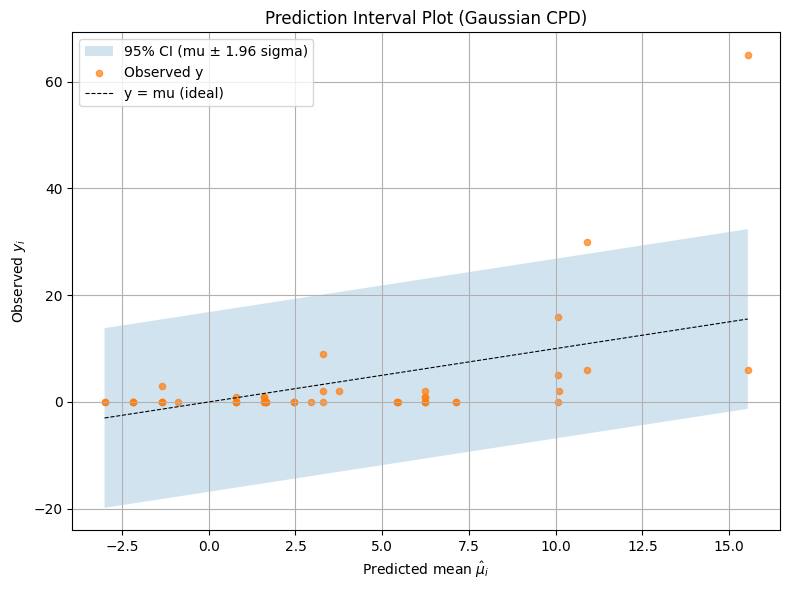

In [41]:
mu_hat = X_test_design @ beta_hat  # predicted mean
sigma_hat = np.sqrt(sigma2)         # predicted stddev

# --- 7) Prediction-Interval-Plot ---
# 95%-CI approx: mu ± 1.96 * sigma_hat
ci_low  = mu_hat - 1.96 * sigma_hat
ci_high = mu_hat + 1.96 * sigma_hat

# Sortieren nach mu_hat, damit Band sauber gezeichnet wird
order = np.argsort(mu_hat)
mu_sorted = mu_hat[order]
ci_low_sorted = ci_low[order]
ci_high_sorted = ci_high[order]
y_obs_sorted = yte.reshape(-1)[order]

plt.figure(figsize=(8,6))
# CI band
plt.fill_between(mu_sorted, ci_low_sorted, ci_high_sorted, alpha=0.2, label='95% CI (mu ± 1.96 sigma)')
# Punktplot: predicted mean (x) vs observed y (y)
plt.scatter(mu_sorted, y_obs_sorted, s=20, alpha=0.7, label='Observed y')
# Referenzlinie y = mu (falls du das noch hervorheben willst)
plt.plot(mu_sorted, mu_sorted, color='k', linestyle='--', linewidth=0.8, label='y = mu (ideal)')

plt.xlabel('Predicted mean $\\hat\\mu_i$')
plt.ylabel('Observed $y_i$')
plt.title('Prediction Interval Plot (Gaussian CPD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("prediction_interval_plot.png", dpi=150)
plt.show()

> **Erläuterung zum Prediction-Interval-Plot**
>
> Die schattierte Fläche zeigt den Bereich, in dem der Gauß-CPD 95% seiner Masse erwartet (unter der Homoskedastizitäts-Annahme mit konstanter $\hat{\sigma}$).
> - Punkte außerhalb des Bandes sind Beobachtungen, die unerwartet groß/klein für ihr $\hat{\mu_i}$ sind.
> - Punkte innerhalb des Bandes sind Beobachtungen, die erwartungsgemäß für ihr $\hat{\mu_i}$ sind.
> - Wenn viele Punkte systematisch ober- oder unterhalb der Diagonale liegen oder viele Punkte außerhalb der Bänder, ist das ein Hinweis, dass das Modell (oder die Varianzannahme) nicht passt.

> **Empfehlung zur Interpretation des Prediction-Interval-Plots** (generiert mit GPT-5)
> 
> - Wenn viele Punkte außerhalb des 95%-Bandes liegen → Modell passt schlecht (Varianz falsch oder Mittelwertsystematik).
> - Wenn Bandbreite konstant und Beobachtungen klarer über/unter dem Band gruppiert → Hinweis auf Heteroskedastizität oder fehlende Prädiktoren/interaktion.
> - Für Zähldaten solltest du denselben Plot auch für ein Poisson/NegBin-Modell machen — dort sind die Intervalle (z. B. konstruierte Vorhersageintervalle) oft schmaler/besser passen

### 1.4.2 **Frage 2:** Warum ist ein Gauß-Modell für diese Art von Daten nicht ideal?

Kurzfassung: Weil die Zielvariable eine Zählvariable ist (Anzahl gefangener Fische). Konkrete Probleme:

1. **Diskret und nicht-negativ**:<br>Gauß ist kontinuierlich und unterstützt negative Werte. Für Zählvariablen kann ein Gauß-CI Werte < 0 enthalten → physikalisch hier nicht sinnvoll (es können keine negativen Fische gefangen werden).

2. **Verteilung ist oft schief (rechtssteil) & viele Nullen**:<br>Zähldaten sind meist rechtsschief und können viele Nullen (zero-inflation) haben. Gauß-Verteilung ist symmetrisch.

3. **Varianz-Struktur (Heteroskedastizität)**:<br>Bei Poisson-artige Daten gilt oft $Var(y)≈E[y]$ (Varianz wächst mit Mittelwert). Gauß mit konstanter $\sigma^2$ nimmt Homoskedastizität an → trifft oft nicht zu. $\sigma^2$ nimmt Homoskedastizität an → trifft oft nicht zu.

4. **Diskretheit & kleine Mittelwerte**:<br>Wenn Mittelwerte klein (z.B. 0,1,2), ist die Gauß-Approximation sehr schlecht; Poisson/NegBin sind dann deutlich besser.

5. **Zero-Inflation**:<br>Viele Beobachtungen mit exakt 0 können auftreten; dann sind Zero-inflated Poisson/NegBin-Modelle sinnvoller.


**Bessere Alternativen:**

- Poisson-Regression (GLM mit log-Link) — gut falls Varianz ≈ Mittelwert (siehe Aufgabenteil [1.5](exercise_2_1.ipynb#15-poisson-regression))
- Negative Binomial — wenn Überdispersion (Varianz > Mittelwert).
- Zero-Inflated Modelle — wenn viele Nullen (ZIP, ZINB).
- Quantil-Regressions / Konfidenz-Bänder via Bootstrap — wenn du keine Verteilungsannahme treffen willst.

## 1.5 Poisson Regression

Bei diesen Daten handelt es sich um Zähldaten. Zähldaten haben nur positive Werte und die Verteilung ist diskret. Man kann nicht 0,5 Fische fangen, und dass die CPD eine Wahrscheinlichkeitsdichte > 0 für negative Fischzahlen hat, ist ebenfalls falsch. Eine Gaußsche Verteilung als CPD ist daher nicht ideal. 

Verwenden Sie nun ein Modell mit Poisson-Verteilung als CPD. Wenn wir eine Poisson-Verteilung annehmen, ergibt sich die Wahrscheinlichkeit, $k$ Fische zu fangen, aus

$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

und die NLL ergibt sich somit aus:

$$
 \text{NLL} = -\log(p(k)) = \mu  - k \cdot \log(\mu) + \log(k!)
$$

wobei $\mu$ der Erwartungswert ist. In unserem Fall die erwartete durchschnittliche Anzahl an Fischen.


Ein kleines zusätzliches Detail: Für den Poisson-Fall muss $\mu_i$ positiv sein. Wir verwenden daher nicht direkt $\beta^T \cdot x_i$, sondern „leiten“ es zunächst durch eine Exponentialfunktion, um es positiv zu machen und somit $\mu_i=exp(\beta^T \cdot x_i)$ mit den Daten zu verknüpfen.

Verwenden Sie einen Gradientenabstiegsansatz für die NLL, um die Lösung für die Parameter zu finden. Berechnen Sie den RMSE und die NLL für den Testsatz und vergleichen Sie diese mit 1.3.

Hinweis: Im Trainingssatz sollten die NLL für die Parameterwerte (1,1,1,1,1) ca. 1508 betragen und der Gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7) sein. Für die NLL wäre eine gute Lernrate 0.001 und das Training sollte für mindestens 5000 Epochen durchgeführt werden.

### 1.5.1 Ziel der Aufgabe

Ziel ist es ein probabilistisches Modell für Zähldaten (Count Data) zu trainieren, also Daten, bei denen die Zielvariable 
$y_i∈\{0,1,2,3,… \}$ nur ganze, nicht-negative Werte annehmen kann (z. B. Anzahl gefangener Fische).

Laut Aufgabenstellung sieht das Modell wie folgt aus:

$$
p(y_i|x_i) = Poisson(y_i; \mu_i) \text{ mit } \mu_i = \exp(\beta^T \cdot x_i)
$$

#### Gradientenableitung

Zur Minimierung der NLL mittels Gradientenabstieg benötigen wir den Gradienten der NLL nach den Parametern $\beta$:

$$
\frac{∂ \text{NLL}}{∂ \beta} = \sum_{i=1}^{N} (\mu_i - y_i) x_i
$$



In [50]:
import numpy as np
from scipy.stats import poisson

# Negative Log-Likelihood using scipy.stats.poisson.logpmf
def poisson_nll(k, mu):
    # Return the negative log of the Poisson PMF for a given k and mu
    return -poisson.logpmf(k, mu)

# Gradient of Poisson NLL with respect to beta_j for a single data point
def gradient_poisson_nll(x, k, mu):
    # The gradient of NLL with respect to beta_j
    return (1 - k / mu) * mu * x

# Gradient descent for minimizing NLL
def gradient_descent(X, y, learning_rate=0.001, epochs=5000):
    # Initialize beta with ones (same size as number of features)
    beta = np.ones(X.shape[1])
    nll_values = []
    # Iterate through epochs
    for epoch in range(epochs):
        gradients = np.zeros_like(beta)
        nll = 0

        # Calculate the NLL and gradients for each data point
        for i in range(len(y)):
            xi = X[i]  # Feature vector for data point i
            ki = y[i]  # Observed count (number of fish) for data point i
            mu_i = np.exp(np.dot(beta, xi))  # Expected value, mu_i = exp(beta^T * x_i)

            # Compute NLL for this data point using Poisson logpmf
            nll += poisson_nll(ki, mu_i)

            # Compute the gradient of the NLL w.r.t. beta for this data point
            gradients += gradient_poisson_nll(xi, ki, mu_i)

        # Average gradient and NLL over all data points
        gradients /= len(y)
        nll /= len(y)
        nll_values.append(nll)

        # Update parameters using gradient descent
        beta -= learning_rate * gradients

        # Optionally print the progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: NLL = {nll}")
            print(f"Gradients {gradients}")

    return beta, nll, nll_values

# RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))



# Perform gradient descent to minimize NLL
beta, nll, nll_values = gradient_descent(np.array(Xt), np.array(yt), learning_rate=0.001, epochs=5000)

# Test predictions on the training set
mu_pred = np.exp(np.dot(np.array(Xt), beta))  # Predicted means for each data point

# Calculate RMSE on the training set
rmse_value = rmse(np.array(yt), mu_pred)

# Print results
print("\n")
print(f"Final parameters:\t{beta}")
print(f"Training RMSE:\t\t{rmse_value}")
print(f"Training NLL:\t\t{nll}")

Epoch 0: NLL = 549.2733703350026
Gradients [ 514.4274514   429.11998072 2090.43541854 1198.41826395]
Epoch 1000: NLL = 4.098926166507145
Gradients [ 0.34600105  0.20108649 -0.20277581  0.52264824]
Epoch 2000: NLL = 3.891554376498235
Gradients [ 0.16852302  0.0417025  -0.07026969  0.19844039]
Epoch 3000: NLL = 3.8536928584527685
Gradients [ 0.08722907 -0.00034657 -0.02921038  0.09039382]
Epoch 4000: NLL = 3.844570052207059
Gradients [ 0.04712787 -0.0086992  -0.0133197   0.04403469]


Final parameters:	[-0.09716947  0.38512735  0.66454999 -1.61716755]
Training RMSE:		10.491380209000772
Training NLL:		3.8420518656189104


## 1.6 Poisson Prediction Interval Plot
Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Erwartung: `beta` (gelerntes Parameter-Vektor) und `Xte`, `yte` sind im Notebook vorhanden.
# Erstelle Design-Matrix für Testset (Intercept + Features)
X_test = np.hstack([np.ones((Xte.shape[0], 1)), Xte])
y_test = np.array(yte).flatten()

# Predicted mean for Poisson: mu = exp(X beta)
mu = np.exp(X_test @ beta)

# 2.5% und 97.5% Perzentile der Poisson-Verteilung für jedes mu_i
lower = poisson.ppf(0.025, mu)
upper = poisson.ppf(0.975, mu)

# Sortieren nach mu für sauberes Band
idx = np.argsort(mu)
mu_s = mu[idx]
lower_s = lower[idx]
upper_s = upper[idx]
y_s = y_test[idx]

plt.figure(figsize=(8,5))
plt.fill_between(mu_s, lower_s, upper_s, color='C0', alpha=0.25, label='95\\% CI (Poisson)')
plt.plot(mu_s, mu_s, color='C0', lw=2, label='predicted mean')
plt.scatter(mu, y_test, s=20, color='C1', alpha=0.7, label='observed y')
plt.xlabel('predicted mean (\\hat{\\mu})')
plt.ylabel('observed y')
plt.title('Prediction interval plot (Poisson CPD)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)